In [10]:
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt

In [2]:
c_dists = pd.read_csv('conservative_embedding_distances.csv')
l_dists = pd.read_csv('liberal_embedding_distances.csv')

In [3]:
political_words = ['trump', 'president', 'people', 'state', 'house', 'report', 'news', 'mueller', 'american', 'government',
                   'law', 'democrats', 'right', 'campaign', 'states', 'media', 'department', 'us', 'barr', 'political', 'white',
                   'justice', 'world', 'public', 'democratic', 'country', 'investigation', 'court', 'border', 'national', 'left',
                   'united', 'fbi', 'america', 'abortion', 'twitter', 'administration', 'attorney', 'women', 'biden', 'congress',
                   'children', 'party', 'police', 'bill', 'security', 'committee', 'work', 'man', 'federal', 'washington', 'election',
                   'policy', 'russia', 'family', 'officials', 'anti', 'counsel', 'donald', 'obama', 'statement', 'presidential', 'power',
                   'war', 'rights', 'foreign', 'americans', 'care', 'social', 'fact', 'health', 'students', 'clinton',
                   'intelligence', 'evidence', 'human', 'deal', 'believe', 'senate', 'free', 'woman', 'sanders', 'men', 'immigration',
                   'change', 'point', 'rep', 'russian', 'republican', 'legal', 'speech', 'story', 'decision', 'director', 'system', 'child',
                   'tax', 'mexico', 'history', 'money', 'crime', 'order', 'released', 'plan', 'military', 'secretary', 'vote',
                   'illegal', 'israel', 'iran', 'politics', 'college', 'working', 'community', 'death', 'china', 'pelosi', 'nation',
                   'republicans', 'control', 'black', 'god', 'job', 'california', 'criminal', 'conservative', 'candidate', 'official',
                   'democrat', 'cortez', 'defense', 'omar', 'ocasio', 'impeachment', 'press', 'attack', 'reports', 'enforcement', 'attacks',
                   'laws', 'accused', 'supreme', 'north', 'leader', 'church', 'amendment', 'crisis', 'tweet', 'gun', 'hillary', 'texas',
                   'research', 'violence', 'freedom', 'policies', 'voters', 'executive', 'truth', 'charges', 'claimed', 'christian', 'warren',
                   'civil', 'mayor', 'economic', 'majority', 'families', 'senior', 'hate', 'collusion', 'wall', 'race', 'source', 'education',
                   'kids', 'buttigieg', 'actions', 'rule', 'flynn', 'immigrants', 'term', 'bernie', 'liberal', 'migrants', 'threat',
                   'hope', 'authorities', 'documents', 'chairman', 'vice', 'candidates', 'countries', 'doj', 'surveillance', 'congressional',
                   'society', 'faith', 'comey', 'medical', 'southern', 'economy', 'opinion', 'alleged', 'international', 'class', 'citizens',
                   'star', 'sexual', 'union', 'legislation', 'british', 'guilty', 'jewish', 'jews', 'prison', 'climate', 'passed',
                   'constitutional', 'probe', 'opposition', 'elected', 'debate', 'shooting', 'gay', 'primary', 'minister', 'conservatives',
                   'asylum', 'gender', 'constitution', 'progressive', 'leadership', 'testimony', 'crimes', 'homeland', 'abortions', 'officers',
                   'florida', 'terrorist', 'ban', 'dangerous', 'reporters', 'drug', 'muslim', 'tariffs', 'chinese', 'catholic', 'georgia', 'green',
                   'racist', 'reporter', 'agencies', 'veterans', 'murder', 'schools', 'investigations', 'senator', 'jobs', 'employees', 'financial',
                   'authority', 'fear', 'nuclear', 'red']

In [4]:
c_dists.columns = ['c_distance', 'word1', 'word2']
l_dists.columns = ['l_distance', 'word1', 'word2']

In [5]:
both_dists = pd.merge(c_dists, l_dists, how='inner', left_on=['word1', 'word2'], right_on = ['word1', 'word2'])
both_dists.head()

,c_distance,word1,word2,l_distance
0,0.553678,trump,president,0.603374
1,0.727379,trump,people,0.753859
2,0.806739,trump,state,0.759375
3,0.684166,trump,house,0.646448
4,0.717301,trump,report,0.735944


In [6]:
both_dists['difference'] = both_dists['c_distance'] - both_dists['l_distance']
both_dists = both_dists.drop_duplicates(subset=['c_distance', 'l_distance'])

In [7]:
both_dists.sort_values(['difference'], ascending=0)

,c_distance,word1,word2,l_distance,difference
9944,0.942442,attorney,prison,0.574591,0.367850
48643,1.039996,threat,veterans,0.676798,0.363198
13338,0.874064,washington,vice,0.536711,0.337353
19830,1.003761,human,vote,0.673271,0.330490
14676,0.933534,officials,jewish,0.606887,0.326647
27614,0.969018,military,red,0.644899,0.324119
27828,0.959025,secretary,prison,0.638644,0.320381
14117,0.906357,russia,immigrants,0.588044,0.318314
22260,0.905958,change,collusion,0.587753,0.318205
29425,0.930338,college,crimes,0.612234,0.318104


In [13]:
trump = both_dists[(both_dists['word1']=='trump') | (both_dists['word2']=='trump')]
trump_sorted = trump.sort_values(['difference'], ascending=0)
trump_plot_data = pd.concat([trump_sorted.head(10), trump_sorted.tail(10)])
trump_plot_data

,c_distance,word1,word2,l_distance,difference
210,0.893530,trump,guilty,0.704190,0.189340
106,0.889304,trump,illegal,0.702169,0.187136
218,0.906716,trump,opposition,0.721906,0.184810
113,0.800721,trump,death,0.657291,0.143431
225,0.849438,trump,conservatives,0.716176,0.133261
39,0.687571,trump,congress,0.559800,0.127771
256,0.891820,trump,jobs,0.768472,0.123347
233,0.858028,trump,homeland,0.735184,0.122843
206,0.822773,trump,sexual,0.704788,0.117985
98,0.886497,trump,money,0.774670,0.111826


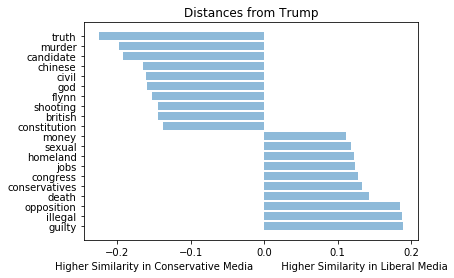

In [19]:
plt.barh(trump_plot_data['word2'], trump_plot_data['difference'], align='center', alpha=0.5)
plt.xlabel('Higher Similarity in Conservative Media         Higher Similarity in Liberal Media')
plt.title('Distances from Trump')
plt.show()